In [1]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.datasets import VOCDetection
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, ToTensor
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch.multiprocessing as mp
from torchvision.transforms import functional as F
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from typing import Dict
import numpy as np

Training epoch 1/50: 100%|████████████████████████████████████████████████████| 25/25 [00:03<00:00,  7.88batch/s, batch_loss=17.3]


Epoch loss: 12.701381297111512


Training epoch 2/50: 100%|████████████████████████████████████████████████████| 25/25 [00:03<00:00,  8.00batch/s, batch_loss=4.98]


Epoch loss: 8.514544758796692


Training epoch 3/50: 100%|████████████████████████████████████████████████████| 25/25 [00:03<00:00,  8.24batch/s, batch_loss=10.1]


Epoch loss: 8.026162662506103


Training epoch 4/50: 100%|████████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.43batch/s, batch_loss=17.7]


Epoch loss: 8.614783515930176


Training epoch 5/50: 100%|████████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.57batch/s, batch_loss=3.07]


Epoch loss: 7.791642388105393


Training epoch 6/50: 100%|████████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.67batch/s, batch_loss=9.65]


Epoch loss: 7.918152475357056


Training epoch 7/50: 100%|████████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.64batch/s, batch_loss=5.44]


Epoch loss: 8.066927729845046


Training epoch 8/50: 100%|████████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.58batch/s, batch_loss=9.81]


Epoch loss: 7.823746742010116


Training epoch 9/50: 100%|████████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.69batch/s, batch_loss=8.09]


Epoch loss: 6.958009896278381


Training epoch 10/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.68batch/s, batch_loss=6.59]


Epoch loss: 6.974721426963806


Training epoch 11/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.73batch/s, batch_loss=3.64]


Epoch loss: 6.702231886386872


Training epoch 12/50: 100%|████████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.82batch/s, batch_loss=4.2]


Epoch loss: 6.893529434204101


Training epoch 13/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.81batch/s, batch_loss=4.44]


Epoch loss: 5.772946012020111


Training epoch 14/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.74batch/s, batch_loss=20.1]


Epoch loss: 6.307399970293045


Training epoch 15/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.85batch/s, batch_loss=3.19]


Epoch loss: 5.15841546535492


Training epoch 16/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.83batch/s, batch_loss=2.35]


Epoch loss: 5.426572276949883


Training epoch 17/50: 100%|██████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.80batch/s, batch_loss=0.416]


Epoch loss: 5.382456928491592


Training epoch 18/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.67batch/s, batch_loss=3.91]


Epoch loss: 5.162588011622429


Training epoch 19/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.60batch/s, batch_loss=2.47]


Epoch loss: 5.131842370033264


Training epoch 20/50: 100%|██████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.65batch/s, batch_loss=0.556]


Epoch loss: 4.935380120277404


Training epoch 21/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.45batch/s, batch_loss=9.09]


Epoch loss: 4.785396492481231


Training epoch 22/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.43batch/s, batch_loss=2.73]


Epoch loss: 5.003632234334946


Training epoch 23/50: 100%|██████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.37batch/s, batch_loss=0.327]


Epoch loss: 4.620845142602921


Training epoch 24/50: 100%|██████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.59batch/s, batch_loss=0.677]


Epoch loss: 4.795751867294311


Training epoch 25/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.37batch/s, batch_loss=6.17]


Epoch loss: 4.4138877546787265


Training epoch 26/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.56batch/s, batch_loss=2.02]


Epoch loss: 4.337985904216766


Training epoch 27/50: 100%|███████████████████████████████████████████████████| 25/25 [00:03<00:00,  8.06batch/s, batch_loss=6.09]


Epoch loss: 4.16355395078659


Training epoch 28/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.48batch/s, batch_loss=5.06]


Epoch loss: 4.146647585630417


Training epoch 29/50: 100%|██████████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.64batch/s, batch_loss=6]


Epoch loss: 4.3887416362762455


Training epoch 30/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.74batch/s, batch_loss=2.98]


Epoch loss: 4.212267911434173


Training epoch 31/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.45batch/s, batch_loss=6.08]


Epoch loss: 4.029478077888489


Training epoch 32/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.64batch/s, batch_loss=3.69]


Epoch loss: 4.1033996641635895


Training epoch 33/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.53batch/s, batch_loss=8.18]


Epoch loss: 4.164313632249832


Training epoch 34/50: 100%|████████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.52batch/s, batch_loss=8.8]


Epoch loss: 3.928464973568916


Training epoch 35/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.48batch/s, batch_loss=2.78]


Epoch loss: 3.950286673307419


Training epoch 36/50: 100%|██████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.45batch/s, batch_loss=0.225]


Epoch loss: 4.135526704788208


Training epoch 37/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.70batch/s, batch_loss=6.01]


Epoch loss: 3.890770793557167


Training epoch 38/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.43batch/s, batch_loss=2.36]


Epoch loss: 3.883085891008377


Training epoch 39/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.82batch/s, batch_loss=3.03]


Epoch loss: 3.9605888295173646


Training epoch 40/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.71batch/s, batch_loss=5.17]


Epoch loss: 3.946639590263367


Training epoch 41/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.92batch/s, batch_loss=7.05]


Epoch loss: 3.7753015780448913


Training epoch 42/50: 100%|████████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.42batch/s, batch_loss=3.4]


Epoch loss: 3.6058947944641115


Training epoch 43/50: 100%|██████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.62batch/s, batch_loss=0.366]


Epoch loss: 3.5861255645751955


Training epoch 44/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.74batch/s, batch_loss=1.64]


Epoch loss: 3.6738657081127166


Training epoch 45/50: 100%|██████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.80batch/s, batch_loss=0.132]


Epoch loss: 3.7022332710027697


Training epoch 46/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.77batch/s, batch_loss=8.79]


Epoch loss: 3.719724427461624


Training epoch 47/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.79batch/s, batch_loss=4.07]


Epoch loss: 3.7194916665554048


Training epoch 48/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.87batch/s, batch_loss=6.45]


Epoch loss: 3.496501250863075


Training epoch 49/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.78batch/s, batch_loss=3.89]


Epoch loss: 3.416080895066261


Training epoch 50/50: 100%|███████████████████████████████████████████████████| 25/25 [00:02<00:00,  8.84batch/s, batch_loss=1.85]

Epoch loss: 3.705528416633606


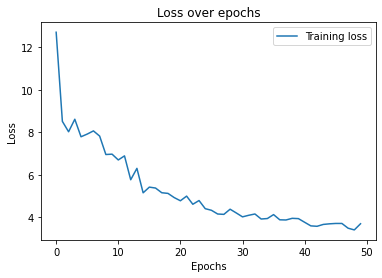

In [4]:
# Multiprocessing
if mp.get_start_method(allow_none=True) != 'spawn':
    mp.set_start_method('spawn', force=True)
    
VOC_CLASSES = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

# Check device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Load the pretrained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

# Replace the classifier with a new one
num_classes = 21 # 20 classes + background
in_features = model.roi_heads.box_predictor.cls_score.in_features

model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Put model to device
model.to(device)

def collate_fn(batch):
    return tuple(zip(*batch))

# Define transformations
def transform_voc_target(image, target):
    boxes = []
    labels = []
    for ann in target["annotation"]["object"]:
        bbox = ann["bndbox"]
        boxes.append([float(bbox["xmin"]), float(bbox["ymin"]), float(bbox["xmax"]), float(bbox["ymax"])])
        labels.append(VOC_CLASSES.index(ann["name"]))

    target = {}
    target["boxes"] = torch.tensor(boxes, dtype=torch.float32)
    target["labels"] = torch.tensor(labels, dtype=torch.int64)
    
    # Convert the image to a tensor
    image = F.to_tensor(image)
    # Resize the image
    image = F.resize(image, [224, 224])

    return image, target

# Apply this function to your dataset using the transforms parameter
train_data = VOCDetection(
    root="pascal_voc_datasets",
    year="2012",
    image_set="val",
    download=False,
    transforms=transform_voc_target
)

# Use collate_fn in DataLoader
data_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=0, collate_fn=collate_fn)

# Define optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.0001, momentum=0.9, weight_decay=0.0005)

# Initialize the gradient scaler
scaler = GradScaler()

# Define loss history for plotting
loss_hist = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    loss_epoch = []
    progress_bar = tqdm(data_loader, desc=f"Training epoch {epoch+1}/{num_epochs}", unit="batch")
    
    for images, targets in progress_bar:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Autocasting and scaling the loss
        with autocast():
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()

        # Scales the loss, and calls backward() 
        scaler.scale(losses).backward()

        # Unscales gradients and calls or skips optimizer.step()
        scaler.step(optimizer)

        # Updates the scale for next iteration
        scaler.update()

        loss_value = losses.item()
        loss_epoch.append(loss_value)
        
        progress_bar.set_postfix({"batch_loss": loss_value})

    epoch_loss = sum(loss_epoch)/len(loss_epoch)
    loss_hist.append(epoch_loss)
    print(f"Epoch loss: {epoch_loss}")

# Plotting the loss
plt.figure()
plt.plot(loss_hist, label='Training loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()